**Derivada de imagen**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2

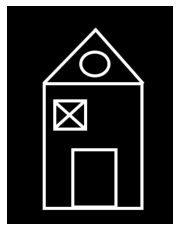

In [2]:
I = cv2.imread('Casita.jfif')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

In [15]:
a,b = I.shape
Idx = np.zeros((a,b))
Idy = np.zeros((a,b))
#print(Idx)

I = I.astype(float)

for i in range(a-1):
    for j in range(b-1):
        Idx[i,j] = I[i+1,j]-I[i,j]
        Idy[i,j] = I[i,j+1]-I[i,j]

print(np.amax(Idx))
print(np.amin(Idx))

255.0
-255.0


(-0.5, 376.5, 494.5, -0.5)

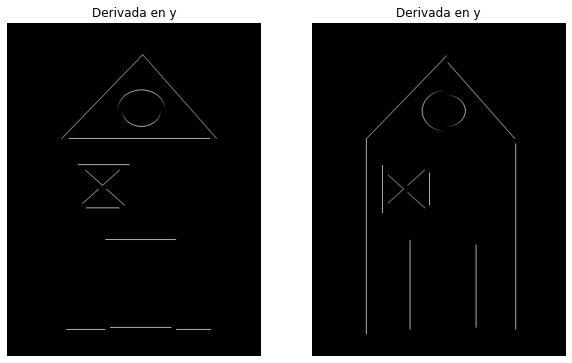

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(Idx, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Derivada en y')
ax[0].axis("off")

ax[1].imshow(Idy, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Derivada en y')
ax[1].axis("off")

(-0.5, 376.5, 494.5, -0.5)

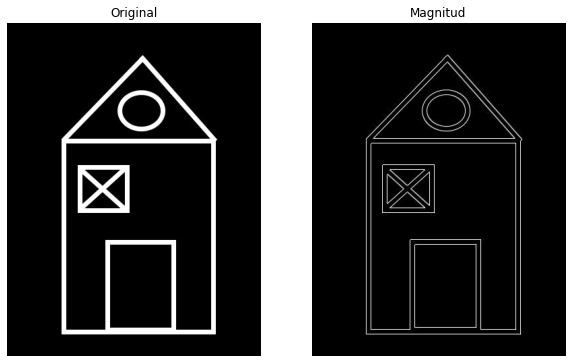

In [20]:
#Magnitud del gradiente
magnitud = np.zeros((a,b))
for i in range(a-1):
    for j in range(b-1):
        magnitud[i,j] = np.sqrt(Idx[i,j]**2 + Idy[i,j]**2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(magnitud, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Magnitud')
ax[1].axis("off")


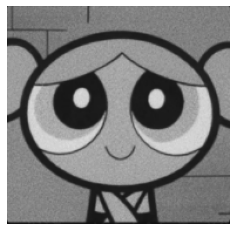

In [27]:
img = cv2.imread('burbuja.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig1=plt.figure(figsize = (4,4))
plt.imshow(img, cmap='gray',vmin=0,vmax=255)
plt.axis('off');

(-0.5, 189.5, 185.5, -0.5)

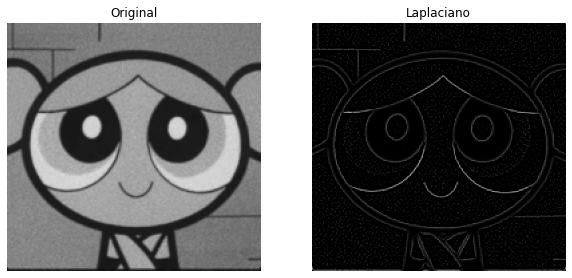

In [28]:
#Filtro Laplaciano
laplacian = cv2.Laplacian(img,cv2.CV_64F)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(laplacian, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Laplaciano')
ax[1].axis("off")

(-0.5, 189.5, 185.5, -0.5)

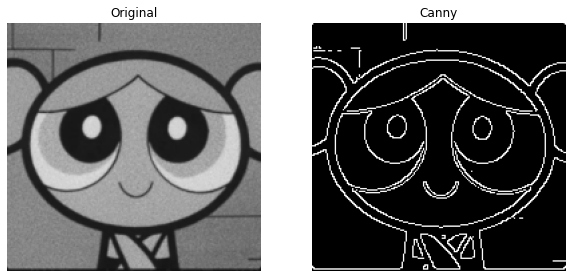

In [32]:
#Filtro Canny
laplacian = cv2.Canny(img,200,230)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(laplacian, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Canny')
ax[1].axis("off")

(-0.5, 189.5, 185.5, -0.5)

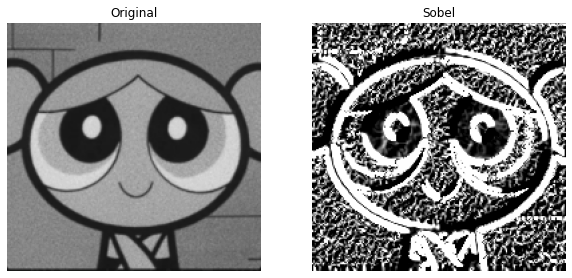

In [35]:
#Filtro Sobel
img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(img, cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")

ax[1].imshow(img_sobel, cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Sobel')
ax[1].axis("off")

In [36]:
#TODO Mejorar  con filtro log opencv